In [1]:
import matplotlib as plt
import seaborn as sns
import pandas as pd
import numpy as np
import json as js

In [2]:
pwd

'/Users/mingyuanma/Desktop/HAI/analysis new'

In [4]:
before = pd.read_csv("../data/phase1/combined1.csv")
before = before[before["round"] >= 3]

In [5]:
after = pd.read_csv("../data/phase2/combined2.csv")
after = after[after["round"] >= 3]

# chi-square testing

In [6]:
from scipy.stats import chi2_contingency
from collections import Counter

def chisquare(array1, array2, count=True):
    if not count:
        data = [array1, array2]
        stat, p, dof, expected = chi2_contingency(data)
        
    else:
        c1, c2 = Counter(array1), Counter(array2)
        before_dis, after_dis = [], []
        for i in set(c1).union(set(c2)):
            before_dis.append(c1[i])
            after_dis.append(c2[i])
        print(before_dis)
        print(after_dis)
        data = [before_dis, after_dis]
        stat, p, dof, expected = chi2_contingency(data)

    alpha = 0.05
    print("p value is " + str(p))
    if p <= alpha:
        print('difference between the two distributions (reject H0)')
    else:
        print('no difference between the two distributions (H0 holds true)')

# Distribution of label before and after

In [7]:
d1 = before.groupby("ResponseId", as_index=False).agg(lambda x:x.iloc[0])
d2 = after.groupby("ResponseId", as_index=False).agg(lambda x:x.iloc[0])


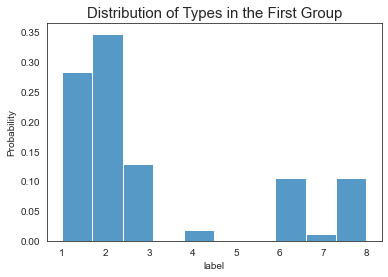

In [8]:
sns.set_style("white")
sns.histplot(data=d1, x="label", stat="probability", palette = "ch:start=.2,rot=-.3").set_title(
    "Distribution of Types in the First Group", fontdict= { 'fontsize': 15});
sns.set(rc={'figure.figsize':(15,7.5)})

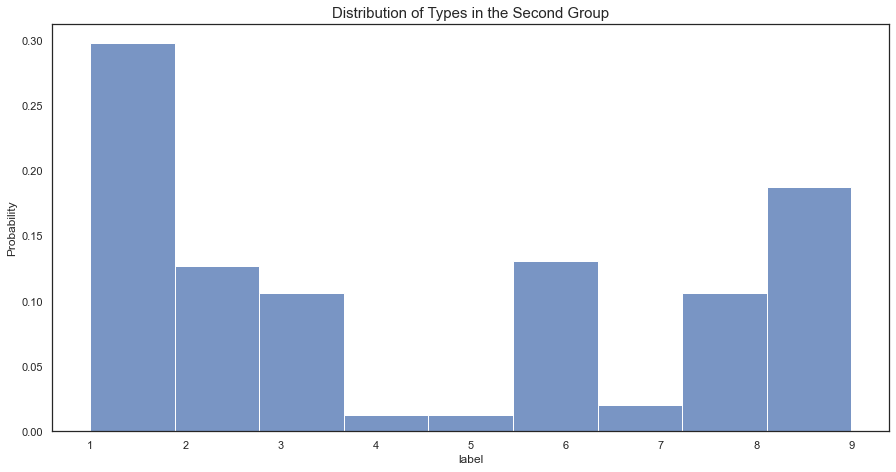

In [9]:
sns.set_style("white")
sns.histplot(data=d2, x="label", stat="probability", palette = "ch:start=.2,rot=-.3").set_title(
    "Distribution of Types in the Second Group", fontdict= { 'fontsize': 15});
sns.set(rc={'figure.figsize':(15,7.5)})

### Chi-Square Testing

In [10]:
chisquare(d1["label"], d2["label"])

[48, 59, 22, 3, 0, 18, 2, 18, 0]
[73, 31, 26, 3, 3, 32, 5, 26, 46]
p value is 1.0415585870358675e-09
difference between the two distributions (reject H0)


# Analysis of Compliance

In [11]:
def compliance(df):
    ids = []
    rounds = []
    server = []
    label = []
    for player in set(np.array(df["ResponseId"])):
        for i in np.arange(1,7):
            tem = df[(df["ResponseId"] == player) & (df["round"] == i)]
            if len(tem) != 0: # no response there
                ids.append(player)
                rounds.append(i)
                l = df[(df["ResponseId"] == player)]["label"].iloc[0]
                label.append(l)
                if i <= 2:
                    num = sum((tem["workerId"] == 2) & (tem["taskId"] == 2))
                else:
                    num = sum((tem["workerId"] == 1) & (tem["taskId"] == 2))
                server.append(num)
#             else:
#                 print(player, i)
    d = {
        "ResponseId": ids,
        "round": rounds,
        "numServerCook": server,
        "label": label
    }
    return pd.DataFrame(d)

In [12]:
after_compliance = compliance(after)

In [13]:
before_compliance = compliance(before)

In [14]:
before_compliance

,ResponseId,round,numServerCook,label
0,R_2tx9RJr2mAXOzZA,3,1,6
1,R_2tx9RJr2mAXOzZA,4,1,6
2,R_2tx9RJr2mAXOzZA,5,1,6
3,R_2tx9RJr2mAXOzZA,6,2,6
4,R_1GxzqMAX7jRAH4b,3,1,1
...,...,...,...,...
675,R_SIel0prtBgGFgNX,6,1,2
676,R_D8pq5IusE99trmF,3,1,1
677,R_D8pq5IusE99trmF,4,0,1
678,R_D8pq5IusE99trmF,5,1,1


## group by rounds

In [15]:
round_before = before_compliance.groupby("round").agg(np.average).loc[:,["numServerCook"]]
round_before

,numServerCook
round,
3,1.105882
4,1.158824
5,1.064706
6,1.252941


In [16]:
round_after = after_compliance.groupby("round").agg(np.average).loc[:,["numServerCook"]]
round_after

,numServerCook
round,
3,1.453061
4,1.697959
5,1.673469
6,1.885714


In [17]:
a = np.array(round_before["numServerCook"])

In [18]:
b = np.array(round_after["numServerCook"])

### chi-square testing

In [19]:
chisquare(a, b, count=False)

p value is 0.9996853376062372
no difference between the two distributions (H0 holds true)


## group by tip

In [20]:
tip_before = before_compliance.groupby("label", as_index=False).agg(np.average).loc[:,["label","numServerCook"]]
tip_before

,label,numServerCook
0,1,1.270833
1,2,1.046610
2,3,0.875000
3,4,1.083333
4,6,1.013889
5,7,0.750000
6,8,1.652778


In [21]:
tip_after = after_compliance.groupby("label", as_index=False).agg(np.average).loc[:,["label","numServerCook"]]
tip_after

,label,numServerCook
0,1,1.558219
1,2,1.532258
2,3,1.480769
3,4,1.750000
4,5,1.333333
5,6,1.460938
6,7,3.700000
7,8,2.346154
8,9,1.646739


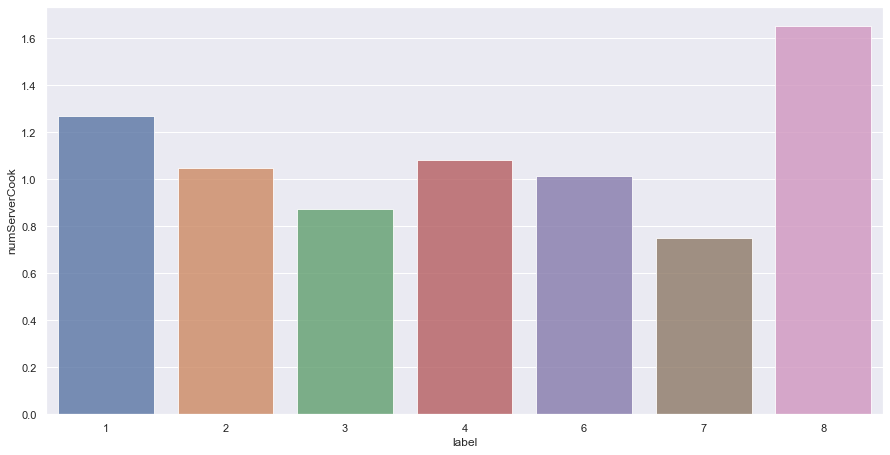

In [22]:
sns.barplot(x="label", y="numServerCook", data=tip_before, alpha=0.8);

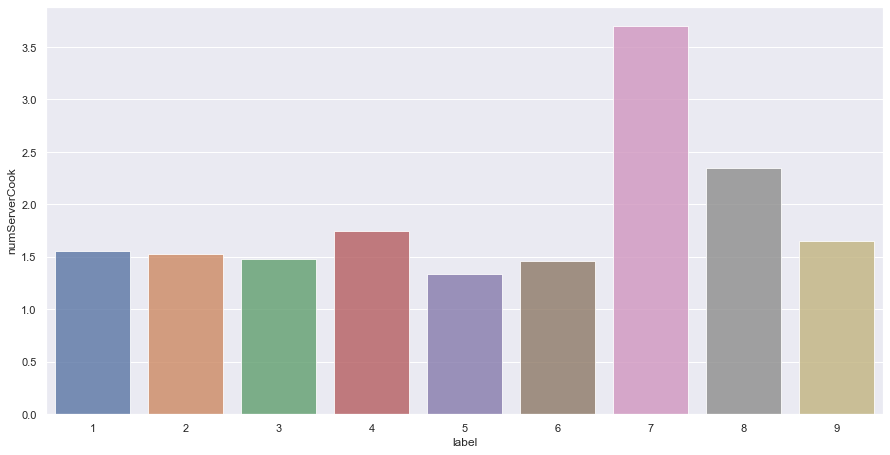

In [23]:
sns.barplot(x="label", y="numServerCook", data=tip_after, alpha=0.8);

### chi-square testing

In [24]:
np.array(tip_before["numServerCook"])

array([1.27083333, 1.04661017, 0.875     , 1.08333333, 1.01388889,
       0.75      , 1.65277778])

In [25]:
tb = np.array([2.14236111, 2.03389831, 2.00757576, 1.94444444, 0, 2.15740741, 2.41666667, 2.05555556, 0])
chisquare(np.array(tb),
         np.array(tip_after["numServerCook"]),count=False)

p value is 0.8963100602783678
no difference between the two distributions (H0 holds true)


## Testing Aversion Distribution

In [26]:
ave_before = before_compliance[(before_compliance["numServerCook"] >= 3) 
                               | (before_compliance["numServerCook"] == 0)].groupby(
                                "label").count().loc[:,["round"]]
ave_before = ave_before.rename(columns = {"round":"numAversion"})
ave_before

,numAversion
label,
1,27
2,47
3,14
6,12
7,3
8,12


In [27]:
ave_after = after_compliance[(after_compliance["numServerCook"] >= 3) 
                               | (after_compliance["numServerCook"] == 0)].groupby(
                                "label").count().loc[:,["round"]]
ave_after = ave_after.rename(columns = {"round":"numAversion"})
ave_after

,numAversion
label,
1,30
2,15
3,13
5,1
6,14
7,7
8,30
9,11


In [28]:
def counting(df):
    count = []
    for i in np.arange(1,10):
        cou = len(df[df["label"] == i])
        count.append(cou)
    return count

In [29]:
counting(before_compliance), counting(after_compliance)
[_ for _ in counting(before_compliance) if _]

[192, 236, 88, 12, 72, 8, 72]

In [30]:
before_compliance.label.unique()

array([6, 1, 3, 2, 8, 7, 4])

In [31]:
label = np.array([1, 2, 3, 4, 6, 7, 8])
numAversion = np.array([27, 47, 14, 0, 12, 3, 12])
ave_before = pd.DataFrame(
                {"label":label,
                "numAversion":numAversion}
).set_index("label")
ave_before

,numAversion
label,
1,27
2,47
3,14
4,0
6,12
7,3
8,12


In [32]:
ave_before['total_num_label'] = [_ for _ in counting(before_compliance) if _]
ave_before["proportion_aversion"] = ave_before["numAversion"] / ave_before['total_num_label']
ave_before["proportion_label"] = ave_before['total_num_label'] / before_compliance.shape[0]
ave_before

,numAversion,total_num_label,proportion_aversion,proportion_label
label,,,,
1,27,192,0.140625,0.282353
2,47,236,0.199153,0.347059
3,14,88,0.159091,0.129412
4,0,12,0.000000,0.017647
6,12,72,0.166667,0.105882
7,3,8,0.375000,0.011765
8,12,72,0.166667,0.105882


In [33]:
after_compliance.label.unique()

array([9, 3, 2, 1, 6, 8, 5, 7, 4])

In [34]:
label_2 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])
numAversion_2 = np.array([30, 15, 13, 0, 1, 14, 7, 30, 11])
ave_after = pd.DataFrame(
                {"label":label_2,
                "numAversion":numAversion_2}
).set_index("label")
ave_after

,numAversion
label,
1,30
2,15
3,13
4,0
5,1
6,14
7,7
8,30
9,11


In [35]:
counting(after_compliance)

[292, 124, 104, 12, 12, 128, 20, 104, 184]

In [36]:
ave_after['total_num_label'] = counting(after_compliance)
ave_after["proportion_aversion"] = ave_after["numAversion"] / ave_after['total_num_label']
ave_after["proportion_label"] = ave_after['total_num_label'] / after_compliance.shape[0]
ave_after

,numAversion,total_num_label,proportion_aversion,proportion_label
label,,,,
1,30,292,0.102740,0.297959
2,15,124,0.120968,0.126531
3,13,104,0.125000,0.106122
4,0,12,0.000000,0.012245
5,1,12,0.083333,0.012245
6,14,128,0.109375,0.130612
7,7,20,0.350000,0.020408
8,30,104,0.288462,0.106122
9,11,184,0.059783,0.187755


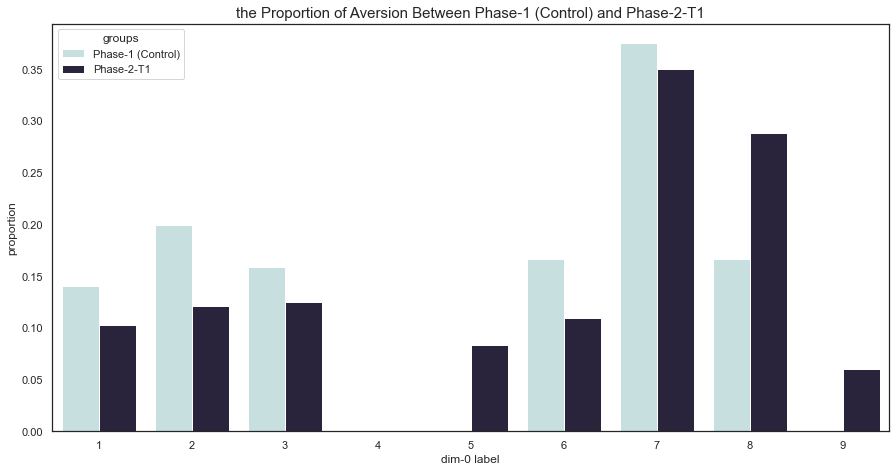

In [37]:
types = [1,2,3,4,6,7,8] + [_ for  _ in range(1,10)]
proportion = ave_before["proportion_aversion"].tolist() + ave_after["proportion_aversion"].tolist()
groups = ["Phase-1 (Control)"]*7 + ["Phase-2-T1"]*9
comparison = pd.DataFrame({
    "dim-0 label":types,
    "proportion":proportion,
    "groups":groups
})
sns.set_style("white")

a = sns.barplot(x = "dim-0 label",
            y = "proportion",
            hue = "groups",
            data = comparison,
            palette = "ch:start=.2,rot=-.3",
            alpha=1).set_title(
  "the Proportion of Aversion Between Phase-1 (Control) and Phase-2-T1",
    fontdict= { 'fontsize': 15})
sns.set(rc={'figure.figsize':(15,7.5)})

## Testing Compliance Distribution

In [38]:
com_before = before_compliance[before_compliance["numServerCook"] ==2].groupby(
                                "label", as_index=False).count().loc[:,["label","round"]]
com_before = com_before.rename(columns = {"round":"numCompliance"})
com_before

,label,numCompliance
0,1,13
1,2,16
2,3,3
3,4,1
4,6,13
5,7,1
6,8,32


In [39]:
com_after = after_compliance[after_compliance["numServerCook"] ==2].groupby(
                                "label", as_index=False).count().loc[:,["label","round"]]
com_after = com_after.rename(columns = {"round":"numCompliance"})
com_after

,label,numCompliance
0,1,112
1,2,42
2,3,34
3,4,9
4,5,5
5,6,36
6,7,2
7,8,38
8,9,104


In [40]:
com_before['total_num_label'] = [_ for _ in counting(before_compliance) if _]
com_before["proportion_compliance"] = com_before["numCompliance"] / com_before['total_num_label']
com_before["proportion_label"] = com_before['total_num_label'] / before_compliance.shape[0]
com_before

,label,numCompliance,total_num_label,proportion_compliance,proportion_label
0,1,13,192,0.067708,0.282353
1,2,16,236,0.067797,0.347059
2,3,3,88,0.034091,0.129412
3,4,1,12,0.083333,0.017647
4,6,13,72,0.180556,0.105882
5,7,1,8,0.125000,0.011765
6,8,32,72,0.444444,0.105882


In [41]:
com_after['total_num_label'] = counting(after_compliance)
com_after["proportion_compliance"] = com_after["numCompliance"] / com_after['total_num_label']
com_after["proportion_label"] = com_after['total_num_label'] / after_compliance.shape[0]
com_after

,label,numCompliance,total_num_label,proportion_compliance,proportion_label
0,1,112,292,0.383562,0.297959
1,2,42,124,0.338710,0.126531
2,3,34,104,0.326923,0.106122
3,4,9,12,0.750000,0.012245
4,5,5,12,0.416667,0.012245
5,6,36,128,0.281250,0.130612
6,7,2,20,0.100000,0.020408
7,8,38,104,0.365385,0.106122
8,9,104,184,0.565217,0.187755


In [46]:
types = [1,2,3,4,6,7,8] + [_ for  _ in range(1,10)]
proportion = com_before["proportion_compliance"].tolist() + com_after["proportion_compliance"].tolist()
groups = ["Control"]*7 + ["T1"]*9
comparison = pd.DataFrame({
    "Content Dimension":types,
    "proportion":proportion,
    "groups":groups
})
comparison

,Content Dimension,proportion,groups
0,1,0.067708,Control
1,2,0.067797,Control
2,3,0.034091,Control
3,4,0.083333,Control
4,6,0.180556,Control
5,7,0.125000,Control
6,8,0.444444,Control
7,1,0.383562,T1
8,2,0.338710,T1
9,3,0.326923,T1


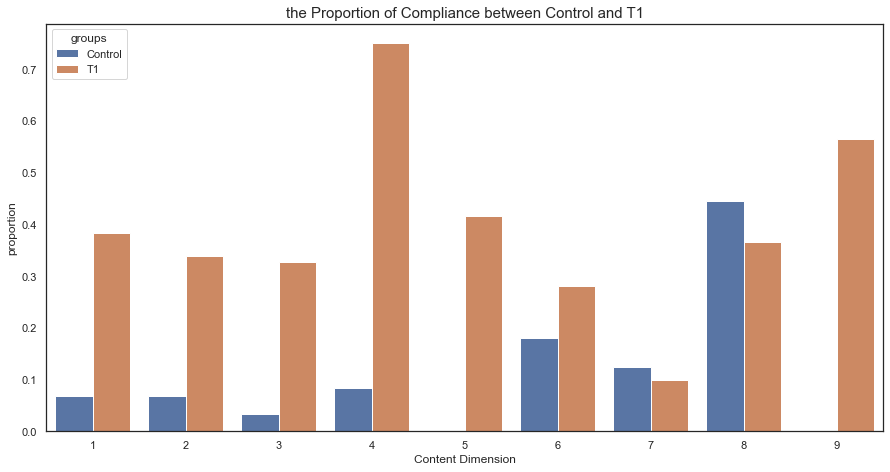

In [52]:
sns.set_style("white")

a = sns.barplot(x = "Content Dimension",
            y = "proportion",
            hue = "groups",
            data = comparison,
            # palette = "ch:start=.2,rot=-.3",
            alpha=1).set_title(
  "the Proportion of Compliance between Control and T1",
    fontdict= { 'fontsize': 15})
sns.set(rc={'figure.figsize':(15,7.5)})
fig = a.get_figure()
fig.savefig("aaa.pdf")
